In [5]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
!pip install missingno

import missingno as mn
import plotly.graph_objects as go

In [13]:
# Using a raw string to specify the file path
df = pd.read_csv(r"C:\Users\ashwa\Downloads\archive (4)\US_Accidents_Dec20_Updated.csv")

C:\Users\ashwa\AppData\Local\Temp\ipykernel_15428\2597536713.py:2: DtypeWarning: Columns (30,31,32,33,34,35,36,37,38,39,40,41,42) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r"C:\Users\ashwa\Downloads\archive (4)\US_Accidents_Dec20_Updated.csv")


In [15]:
# Displaying the DataFrame
df.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,2,2019-05-21 08:29:55,2019-05-21 09:29:40,34.808868,-82.269157,34.808868,-82.269157,0.0,Accident on Tanner Rd at Pennbrooke Ln.,...,False,False,False,False,False,False,Day,Day,Day,Day
1,A-2,2,2019-10-07 17:43:09,2019-10-07 19:42:50,35.090080,-80.745560,35.090080,-80.745560,0.0,Accident on Houston Branch Rd at Providence Br...,...,False,False,False,False,False,False,Day,Day,Day,Day
2,A-3,2,2020-12-13 21:53:00,2020-12-13 22:44:00,37.145730,-121.985052,37.165850,-121.988062,1.4,Stationary traffic on CA-17 from Summit Rd (CA...,...,False,False,False,False,False,False,Night,Night,Night,Night
3,A-4,2,2018-04-17 16:51:23,2018-04-17 17:50:46,39.110390,-119.773781,39.110390,-119.773781,0.0,Accident on US-395 Southbound at Topsy Ln.,...,False,False,False,False,True,False,Day,Day,Day,Day
4,A-5,3,2016-08-31 17:40:49,2016-08-31 18:10:49,26.102942,-80.265091,26.102942,-80.265091,0.0,Accident on I-595 Westbound at Exit 4 / Pine I...,...,False,False,False,False,True,False,Day,Day,Day,Day


# Information about the dataframe

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42768 entries, 0 to 42767
Data columns (total 47 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     42768 non-null  object 
 1   Severity               42768 non-null  int64  
 2   Start_Time             42768 non-null  object 
 3   End_Time               42768 non-null  object 
 4   Start_Lat              42768 non-null  float64
 5   Start_Lng              42767 non-null  float64
 6   End_Lat                38562 non-null  float64
 7   End_Lng                38562 non-null  float64
 8   Distance(mi)           42767 non-null  float64
 9   Description            42767 non-null  object 
 10  Number                 14888 non-null  float64
 11  Street                 42767 non-null  object 
 12  Side                   42767 non-null  object 
 13  City                   42763 non-null  object 
 14  County                 42767 non-null  object 
 15  St

In [18]:
df.shape

(42768, 47)

In [19]:
df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [20]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Severity,42768.0,2.289632,0.555169,1.000000,2.000000,2.000000,3.000000,4.000000
Start_Lat,42768.0,36.495281,4.997337,24.574811,33.631295,36.069109,40.316956,48.997581
Start_Lng,42767.0,-96.397656,17.744411,-124.486270,-117.810017,-91.192314,-80.843825,-68.365955
End_Lat,38562.0,36.474763,4.995932,24.571389,33.603940,36.019261,40.268014,48.997581
End_Lng,38562.0,-96.128667,17.633613,-124.486270,-117.658536,-91.060528,-80.824167,-68.365405
Distance(mi),42767.0,0.395864,1.608695,0.000000,0.000000,0.000000,0.288000,148.360001
Number,14888.0,6686.169130,14504.608766,1.000000,933.000000,3016.000000,7990.250000,851799.000000
Temperature(F),41785.0,61.049345,18.413176,-23.800000,49.000000,63.000000,75.000000,117.000000
Wind_Chill(F),25171.0,55.007914,22.212886,-41.600000,39.000000,58.000000,72.000000,110.000000
Humidity(%),41728.0,65.188363,22.866381,2.000000,49.000000,68.000000,84.000000,100.000000


In [21]:
df.describe(include=object)

,ID,Start_Time,End_Time,Description,Street,Side,City,County,State,Zipcode,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
count,42768,42768,42768,42767,42767,42767,42763,42767,42767,42754,...,42767,42767,42767,42767,42767,42767,42763,42763,42763,42763
unique,42768,42542,42639,38777,16200,2,4501,1020,49,17771,...,2,2,2,2,2,1,2,2,2,2
top,A-1,2016-10-17 07:44:53,2016-10-17 13:44:53,A crash has occurred causing no to minimum del...,I-5 N,R,Houston,Los Angeles,CA,91706,...,False,False,False,False,False,False,Day,Day,Day,Day
freq,1,3,3,32,591,35392,1099,3450,10790,80,...,42764,41924,42109,42752,36046,42767,28700,30655,32718,34363


# Checking for null/missing values in the dataset


In [22]:
df.isna().sum()

ID                           0
Severity                     0
Start_Time                   0
End_Time                     0
Start_Lat                    0
Start_Lng                    1
End_Lat                   4206
End_Lng                   4206
Distance(mi)                 1
Description                  1
Number                   27880
Street                       1
Side                         1
City                         5
County                       1
State                        1
Zipcode                     14
Country                      1
Timezone                    46
Airport_Code                93
Weather_Timestamp          682
Temperature(F)             983
Wind_Chill(F)            17597
Humidity(%)               1040
Pressure(in)               840
Visibility(mi)            1050
Wind_Direction             925
Wind_Speed(mph)           4518
Precipitation(in)        19204
Weather_Condition         1057
Amenity                      1
Bump                         1
Crossing

# Dropping the columns with huge number of null values

In [23]:
df.drop(columns=['End_Lat','End_Lng','Wind_Chill(F)','Precipitation(in)'],axis=1,inplace=True)

In [24]:
#storing categorical column names to a new variable
categorical=[i for i in df.columns if df[i].dtype=='O']
#for categorical values we can replace the null values with the Mode of it
for i in categorical:
    df[i].fillna(df[i].mode()[0],inplace=True)

In [25]:
df.drop(columns=['Wind_Speed(mph)', 'Visibility(mi)', 'Pressure(in)', 'Humidity(%)', 'Temperature(F)'], axis=1, inplace=True)

In [26]:
df.isna().sum()

ID                           0
Severity                     0
Start_Time                   0
End_Time                     0
Start_Lat                    0
Start_Lng                    1
Distance(mi)                 1
Description                  0
Number                   27880
Street                       0
Side                         0
City                         0
County                       0
State                        0
Zipcode                      0
Country                      0
Timezone                     0
Airport_Code                 0
Weather_Timestamp            0
Wind_Direction               0
Weather_Condition            0
Amenity                      0
Bump                         0
Crossing                     0
Give_Way                     0
Junction                     0
No_Exit                      0
Railway                      0
Roundabout                   0
Station                      0
Stop                         0
Traffic_Calming              0
Traffic_

# Checking for duplicate values

In [27]:
df.duplicated().sum()

0

# EDA
City with most Number of accidents

In [28]:
city_acc = df['City'].value_counts().sort_values(ascending = False).reset_index()

In [29]:
city_acc

,index,City
0,Houston,1104
1,Los Angeles,971
2,Charlotte,849
3,Dallas,748
4,Miami,731
...,...,...
4496,Owens Cross Roads,1
4497,Hollsopple,1
4498,Boxborough,1
4499,Indian Harbour Beach,1


# Top 10 cities with most number of accidents

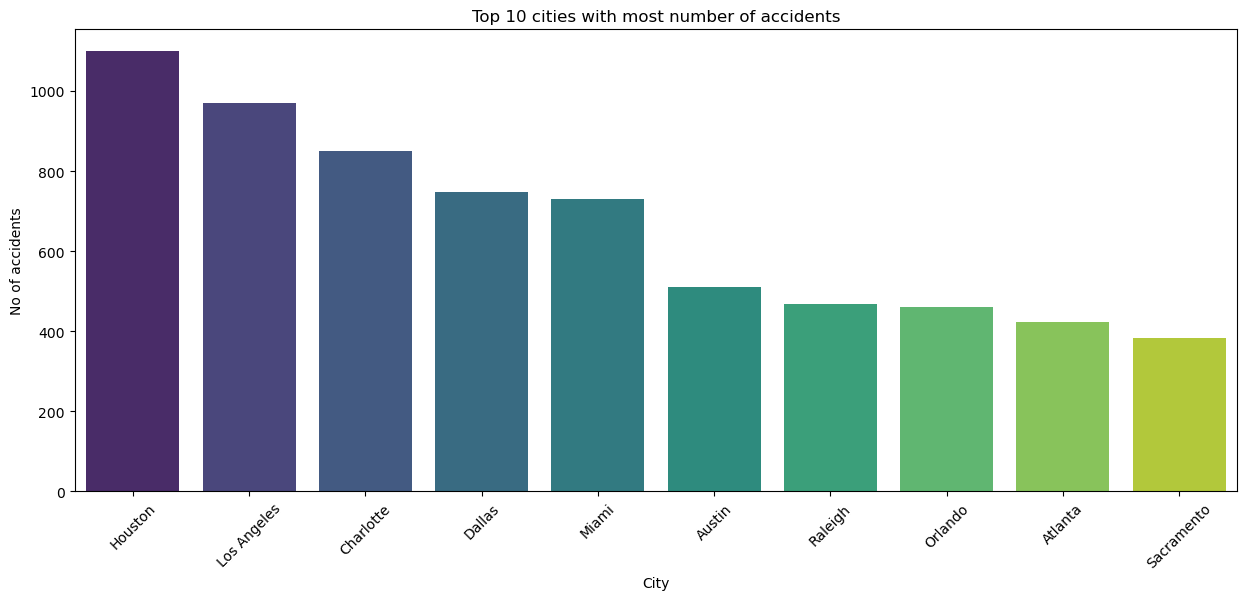

In [31]:
# Assuming 'data' is your DataFrame containing accident records with a column 'City'
# Group by 'City' and count the number of accidents
city_acc = data['City'].value_counts().reset_index()
city_acc.columns = ['City', 'count']

# Plot the top 10 cities with the most number of accidents
plt.figure(figsize=(15,6))
sns.barplot(x='City', y='count', data=city_acc.head(10), palette='viridis')
plt.title("Top 10 cities with most number of accidents")
plt.ylabel("No of accidents")
plt.xlabel("City")
plt.xticks(rotation=45)  # Rotate city names for better readability
plt.show()


# Bottom 10 cities with least number of accidents

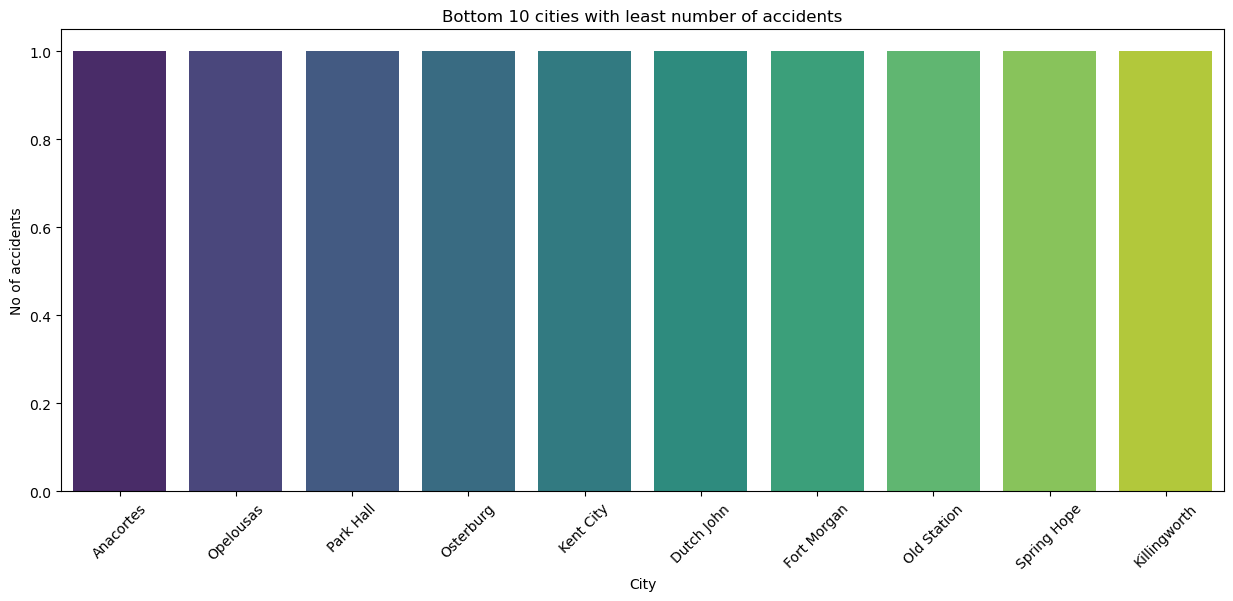

In [32]:
plt.figure(figsize=(15,6))
sns.barplot(x='City',y='count',data= city_acc.tail(10),palette='viridis')
plt.title("Bottom 10 cities with least number of accidents")
plt.ylabel("No of accidents")
plt.xticks(rotation=45)
plt.show()

# State with most and least Number of accidents

In [33]:
state_acc = df['State'].value_counts().sort_values(ascending = False).reset_index()
state_acc

,index,State
0,CA,10791
1,FL,3841
2,TX,3459
3,NY,1908
4,NC,1854
5,SC,1673
6,OR,1403
7,VA,1356
8,PA,1315
9,MN,1153


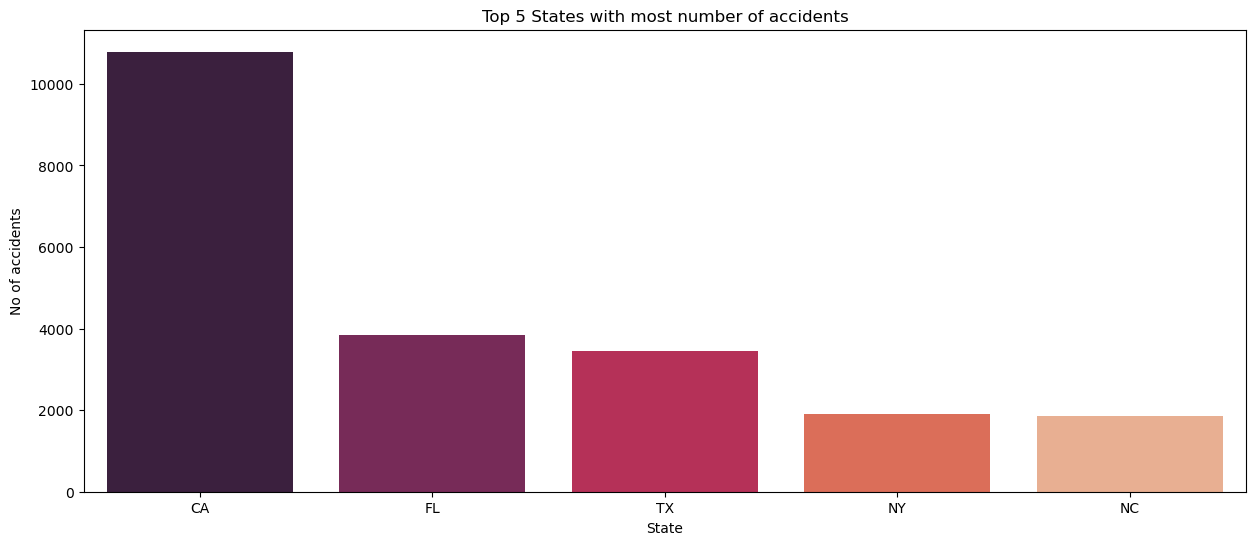

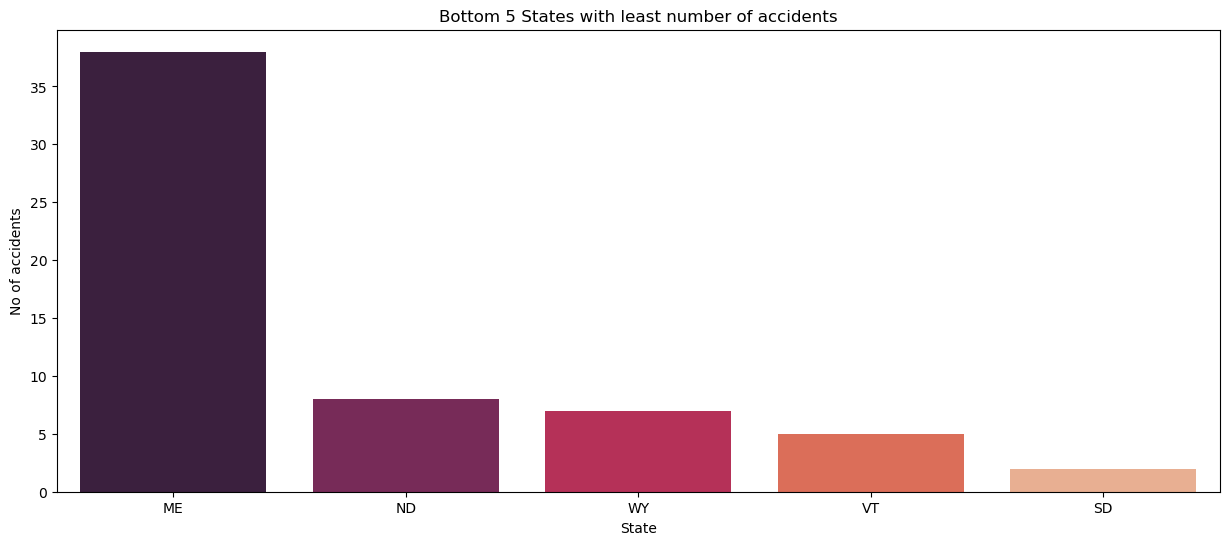

In [35]:
# Group by 'State' and count the number of accidents
state_acc = data['State'].value_counts().reset_index()
state_acc.columns = ['State', 'count']

# Plot the top 5 states with the most number of accidents
plt.figure(figsize=(15,6))
sns.barplot(x='State', y='count', data=state_acc.head(5), palette='rocket')
plt.title("Top 5 States with most number of accidents")
plt.ylabel("No of accidents")
plt.xlabel("State")
plt.show()

# Plot the bottom 5 states with the least number of accidents
plt.figure(figsize=(15,6))
sns.barplot(x='State', y='count', data=state_acc.tail(5), palette='rocket')
plt.title("Bottom 5 States with least number of accidents")
plt.ylabel("No of accidents")
plt.xlabel("State")
plt.show()


In [36]:
#Observations:
df['Severity'].value_counts().index

Int64Index([2, 3, 4, 1], dtype='int64')

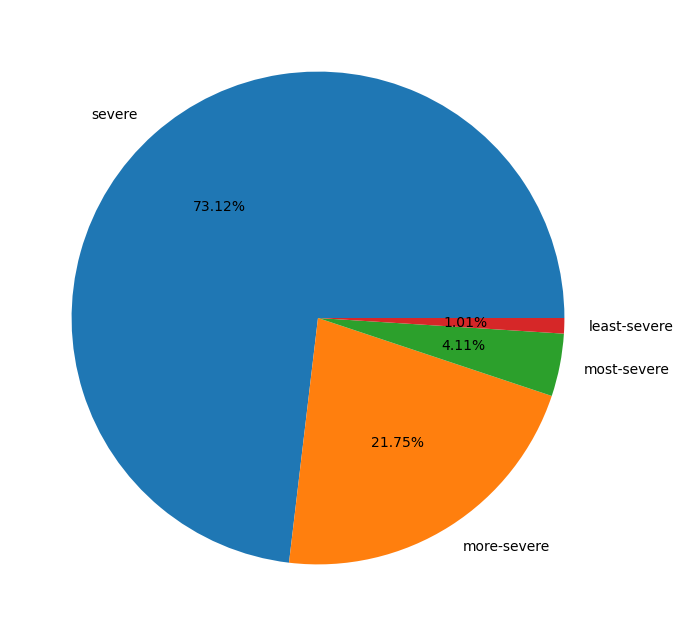

In [37]:
plt.figure(figsize=(8,8))
plt.pie(df['Severity'].value_counts(),labels=['severe','more-severe','most-severe','least-severe'],autopct="%1.2f%%")
plt.show()

In [38]:
# Convert the 'Start_Time' column to datetime format
df['Start_Time'] = pd.to_datetime(df['Start_Time'], errors='coerce')

# Extract the year from the 'Start_Time' column and store it in a new column called 'Year'
df['Year'] = df['Start_Time'].dt.year

# Display the first few rows to verify
print(df[['Start_Time', 'Year']].head())

           Start_Time  Year
0 2019-05-21 08:29:55  2019
1 2019-10-07 17:43:09  2019
2 2020-12-13 21:53:00  2020
3 2018-04-17 16:51:23  2018
4 2016-08-31 17:40:49  2016


In [39]:
df['Year'].value_counts()

2020    15127
2019     9008
2018     8037
2017     6568
2016     4028
Name: Year, dtype: int64

# Years with most number of accidents

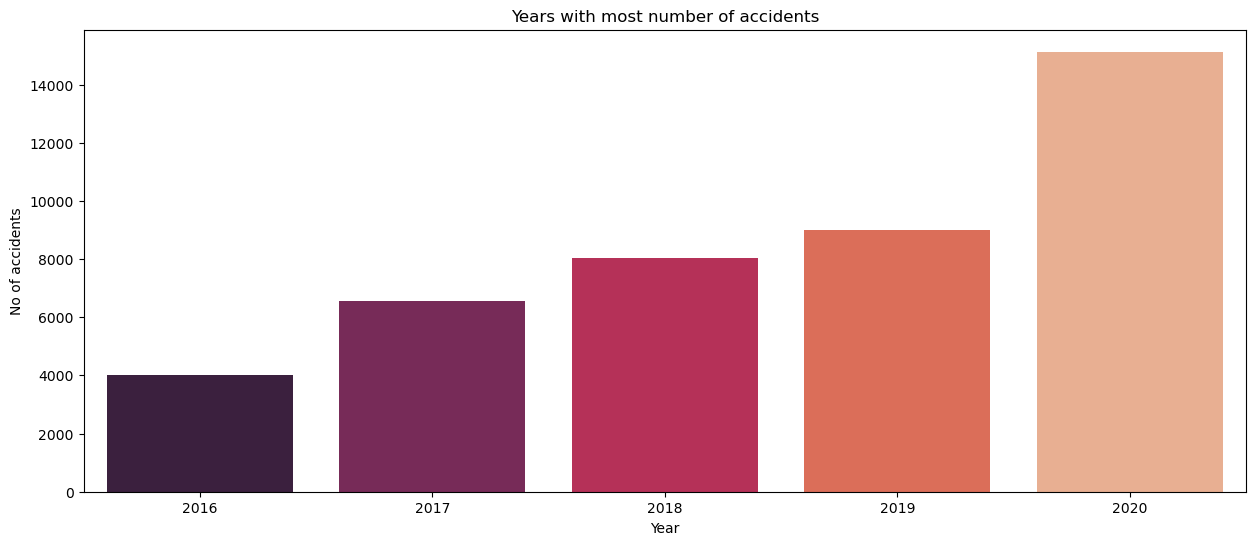

In [41]:
# Get the count of accidents per year
year_count = df['Year'].value_counts().reset_index()
year_count.columns = ['Year', 'count']  # Rename columns for clarity

# Plot the years with the most number of accidents
plt.figure(figsize=(15,6))
sns.barplot(x='Year', y='count', data=year_count, palette='rocket')
plt.title("Years with most number of accidents")
plt.xlabel("Year")
plt.ylabel("No of accidents")
plt.show()

# Number of accidents at different time zones

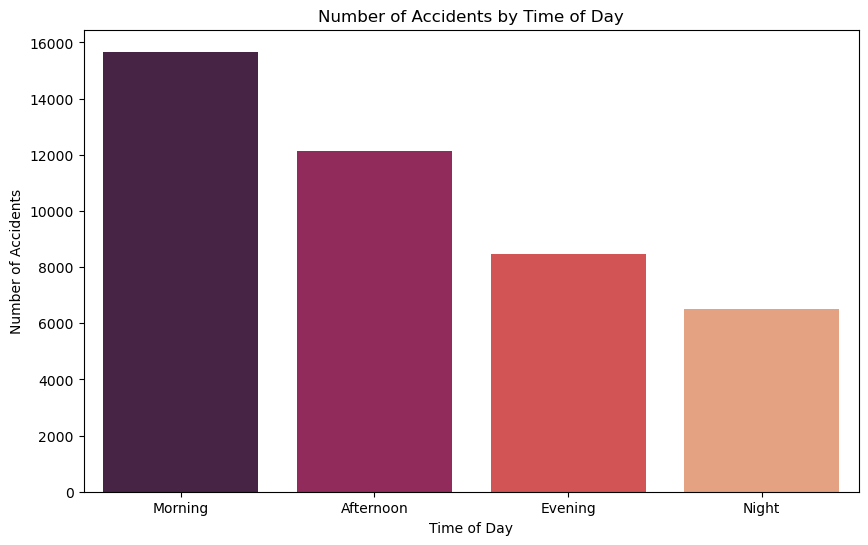

In [42]:
df['Start_Time'] = pd.to_datetime(df['Start_Time'], errors='coerce')

# Extract the time and store it in a new column 'Time'
df['Time'] = df['Start_Time'].dt.time

# Function to categorize time
def categorize_time(time):
    if pd.isna(time):
        return 'Unknown'
    if time >= pd.to_datetime('05:00:00').time() and time < pd.to_datetime('12:00:00').time():
        return 'Morning'
    elif time >= pd.to_datetime('12:00:00').time() and time < pd.to_datetime('17:00:00').time():
        return 'Afternoon'
    elif time >= pd.to_datetime('17:00:00').time() and time < pd.to_datetime('21:00:00').time():
        return 'Evening'
    else:
        return 'Night'

# Apply the function to create a new column 'Time_Zone'
df['Time_Zone'] = df['Time'].apply(categorize_time)

# Filter out 'Unknown' time zones for plotting
filtered_df = df[df['Time_Zone'] != 'Unknown']


# Count the number of accidents in each timezone
time_zone_counts = filtered_df['Time_Zone'].value_counts()

# Plot the distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=time_zone_counts.index, y=time_zone_counts.values, palette='rocket')
plt.xlabel('Time of Day')
plt.ylabel('Number of Accidents')
plt.title('Number of Accidents by Time of Day')
plt.show()

# histogram to show the distribution of accidents through the time zones

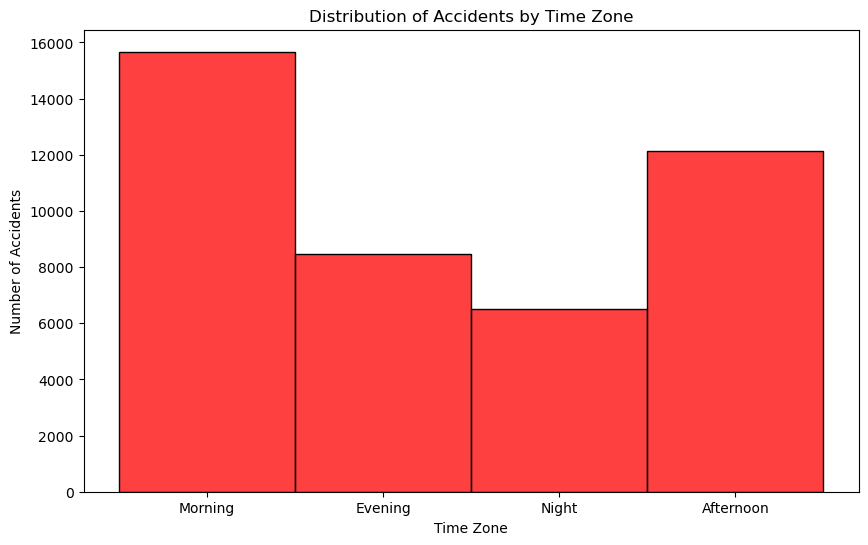

In [44]:
plt.figure(figsize=(10, 6))
sns.histplot(filtered_df['Time_Zone'], bins=4, kde=False, color='red')
plt.xlabel('Time Zone')
plt.ylabel('Number of Accidents')
plt.title('Distribution of Accidents by Time Zone')
plt.show()

# Weather conditions at the time of accidents

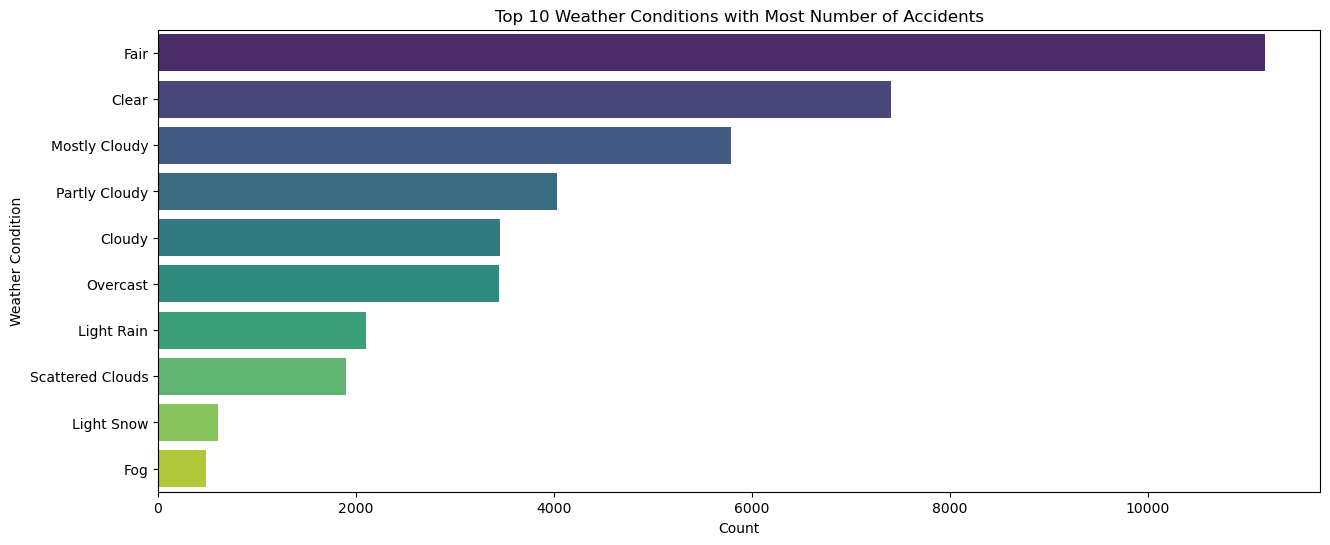

In [46]:
# Get the count of each weather condition
weather = df['Weather_Condition'].value_counts().reset_index()
weather.columns = ['Weather_Condition', 'count']  # Rename columns for clarity

# Plot the top 10 weather conditions with the most number of accidents
plt.figure(figsize=(15,6))
sns.barplot(x='count', y='Weather_Condition', data=weather[:10], palette='viridis')
plt.title("Top 10 Weather Conditions with Most Number of Accidents")
plt.xlabel("Count")
plt.ylabel("Weather Condition")
plt.show()

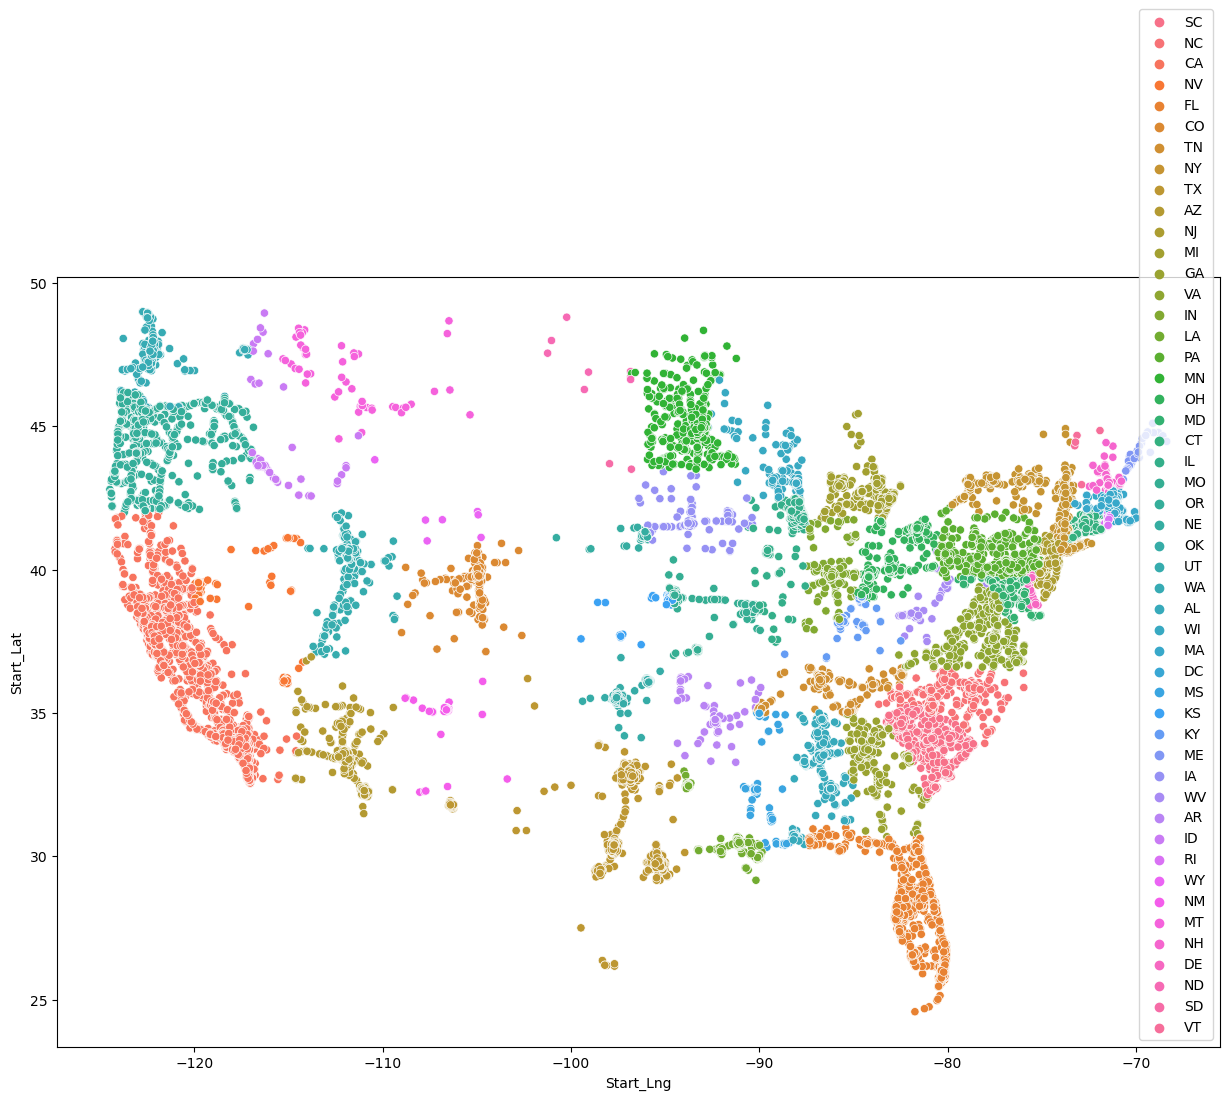

In [47]:
plt.figure(figsize=(15,10))
sns.scatterplot(x=df['Start_Lng'],y=df['Start_Lat'],hue=df['State'])
plt.legend(loc="lower right")
plt.show()

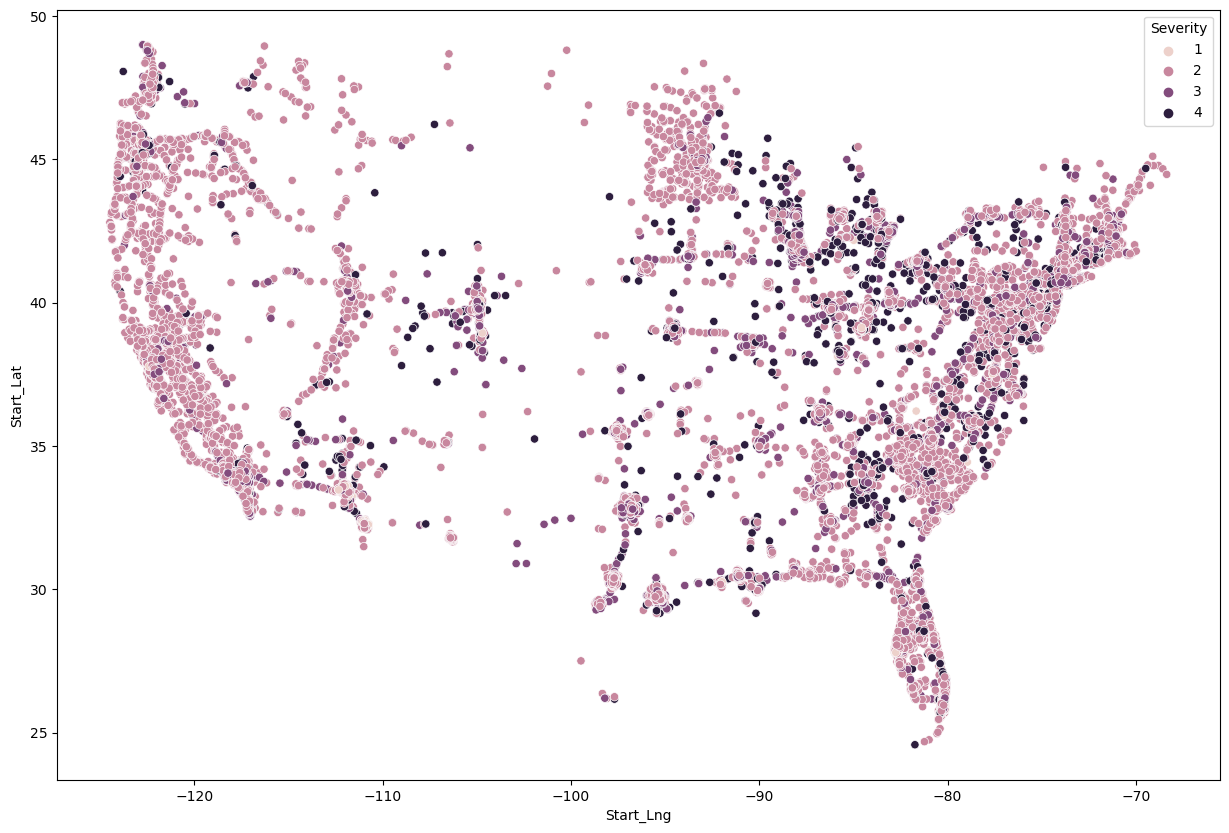

In [48]:
plt.figure(figsize=(15,10))
sns.scatterplot(x=df['Start_Lng'],y=df['Start_Lat'],hue=df['Severity'])
plt.show()